# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
units = 'imperial'

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"

    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | san antonio de pale
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | rouissat
Processing Record 5 of Set 1 | utrik
Processing Record 6 of Set 1 | constantia
Processing Record 7 of Set 1 | polyarnyy
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | sinabang
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | ponta delgada
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | veinticinco de mayo
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | luderi

In [28]:
city_datapd = pd.DataFrame(city_data)
city_datapd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,35.26,80,100,20.71,AR,1698614031
1,san antonio de pale,-1.4014,5.6325,79.83,82,5,9.19,GQ,1698614031
2,adamstown,-25.0660,-130.1015,72.21,84,98,14.67,PN,1698614031
3,rouissat,31.9243,5.3502,80.67,17,40,6.91,DZ,1698614031
4,utrik,11.2278,169.8474,82.90,81,35,18.75,MH,1698614031
...,...,...,...,...,...,...,...,...,...
560,ghat,24.9647,10.1728,80.53,19,13,6.33,LY,1698614159
561,talcahuano,-36.7167,-73.1167,53.28,71,75,13.80,CL,1698614159
562,pointe-noire,-4.7761,11.8635,79.14,87,28,7.70,CG,1698614159
563,yaroslavskiy,44.1683,132.2072,39.40,90,30,6.78,RU,1698614159


In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,25.99,83,100,6.17,CC,1698613360
1,queenstown,-31.8976,26.8753,4.72,79,14,6.85,ZA,1698613360
2,hermanus,-34.4187,19.2345,13.57,64,0,11.54,ZA,1698613360


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,35.26,80,100,20.71,AR,1698614031
1,san antonio de pale,-1.4014,5.6325,79.83,82,5,9.19,GQ,1698614031
2,adamstown,-25.0660,-130.1015,72.21,84,98,14.67,PN,1698614031
3,rouissat,31.9243,5.3502,80.67,17,40,6.91,DZ,1698614031
4,utrik,11.2278,169.8474,82.90,81,35,18.75,MH,1698614031


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

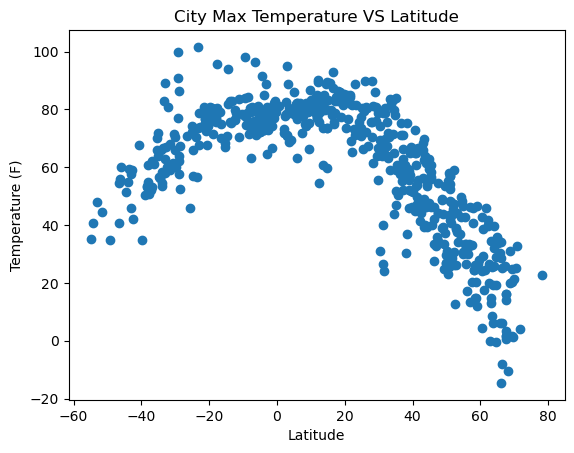

In [4]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title ('City Max Temperature VS Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

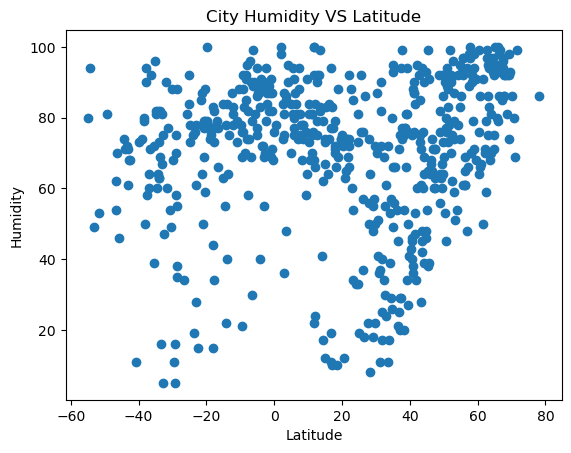

In [5]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title ('City Humidity VS Latitude')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

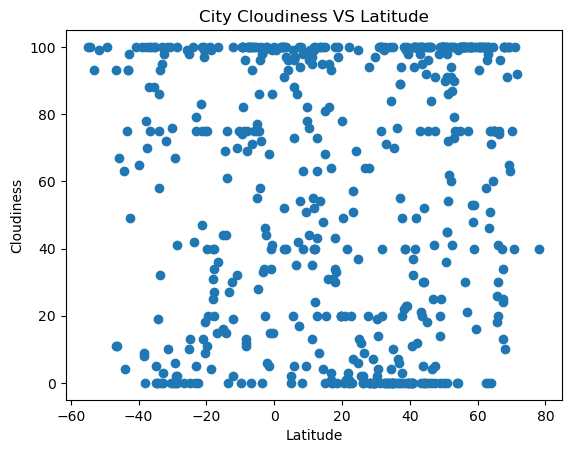

In [6]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title ('City Cloudiness VS Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

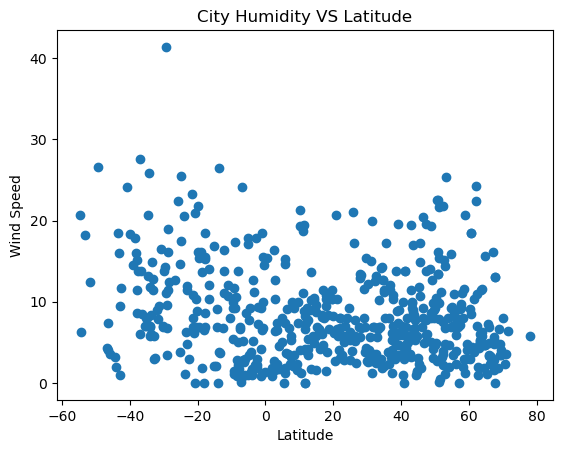

In [7]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title ('City Humidity VS Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from slope and intercept.
    regress_values = x_values * slope + intercept
    # Write line equation for y=mx+b
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Populate line equation and labels for plot
    plt.annotate(line_eq, text_coordinates, fontsize=10, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)

    #Print r value
    print(f"The r-value is: {r_value**2}")
    plt.show()   


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,rouissat,31.9243,5.3502,80.67,17,40,6.91,DZ,1698614031
4,utrik,11.2278,169.8474,82.90,81,35,18.75,MH,1698614031
5,constantia,44.1833,28.6500,54.28,64,0,7.70,RO,1698614031
6,polyarnyy,69.1989,33.4478,20.32,92,100,4.74,RU,1698614032
9,sinabang,2.4803,96.3801,77.76,84,100,2.71,ID,1698614032


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,35.26,80,100,20.71,AR,1698614031
1,san antonio de pale,-1.4014,5.6325,79.83,82,5,9.19,GQ,1698614031
2,adamstown,-25.0660,-130.1015,72.21,84,98,14.67,PN,1698614031
7,avarua,-21.2078,-159.7750,75.25,64,75,8.05,CK,1698614032
8,papatowai,-46.5619,169.4708,54.50,54,11,4.27,NZ,1698614032


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7528959814880344


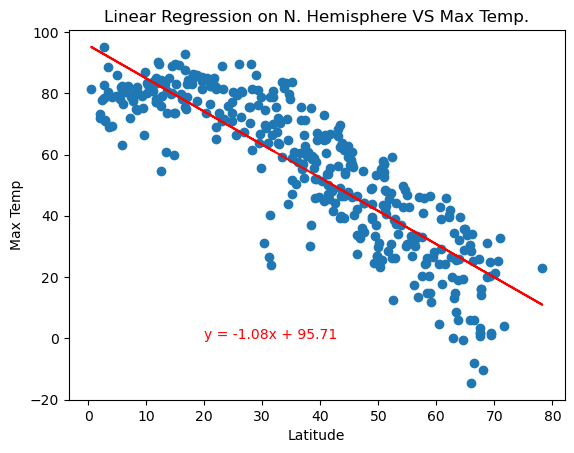

In [37]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Run function for plot.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on N. Hemisphere VS Max Temp.',
                       'Max Temp',(20,0))

The r-value is: 0.5002439102115973


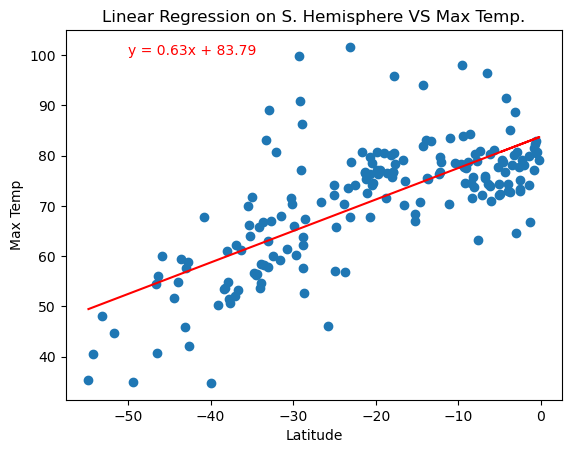

In [38]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Run function for plot.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on S. Hemisphere VS Max Temp.',
                       'Max Temp',(-50,100))

**Discussion about the linear relationship:** In the northern hemisphere we see that as the latitude increases away from the equator the max temperature decreases. 
In the Southern hemisphere it is evident that as the latitude gets closer to the equator, the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03820239510727978


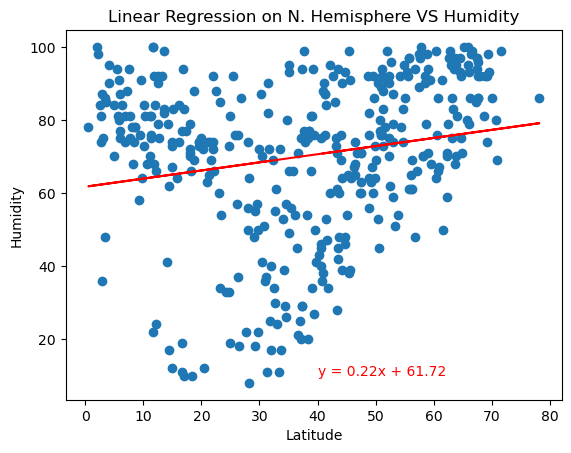

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#Run function for plot.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on N. Hemisphere VS Humidity',
                       'Humidity',(40,10))

The r-value is: 0.07489397777591464


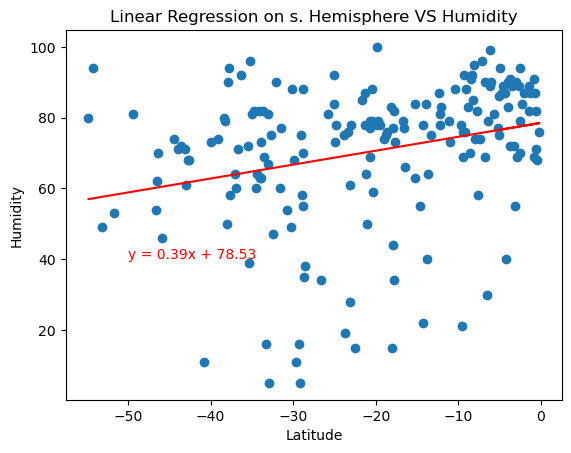

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#Run function for plot.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on s. Hemisphere VS Humidity',
                       'Humidity',(-50,40))

**Discussion about the linear relationship:** From the visualized data we can see that there is a tendency to see more humidity as we get closer to the equator.
however in the northern hemisphere, it looks even more spread out and has an even lower r value than in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02532089657519504


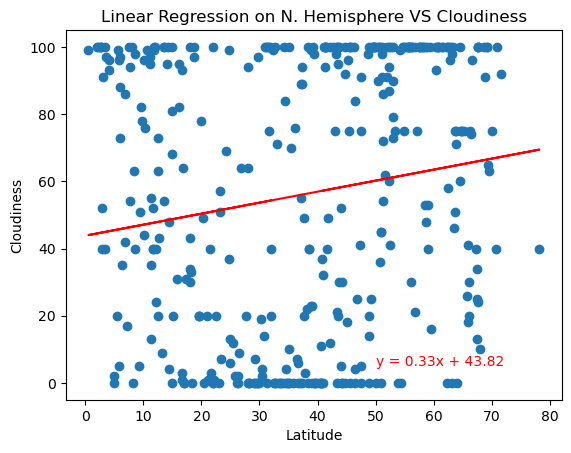

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Run function for plot.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on N. Hemisphere VS Cloudiness',
                       'Cloudiness',(50,5))

The r-value is: 0.0003131113872213307


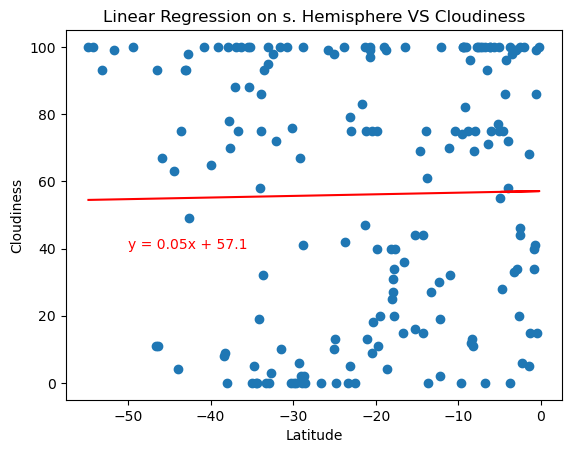

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#Run function for plot.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on s. Hemisphere VS Cloudiness',
                       'Cloudiness',(-50,40))

**Discussion about the linear relationship:** In both hemispheres, it can be almost assumed there is no relation to the linear regression line.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0003204742856253814


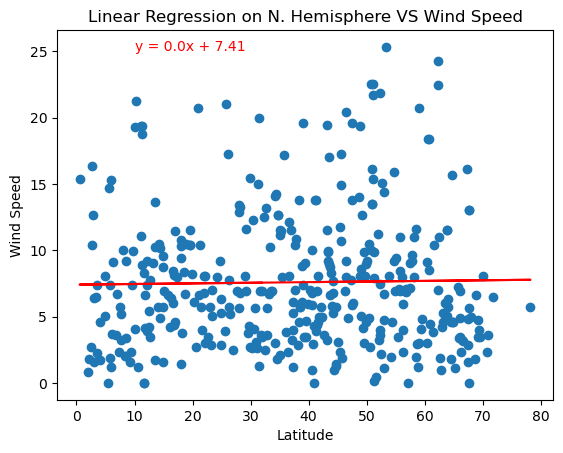

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#Run function for plot.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on N. Hemisphere VS Wind Speed',
                       'Wind Speed',(10,25))

The r-value is: 0.08133599734300759


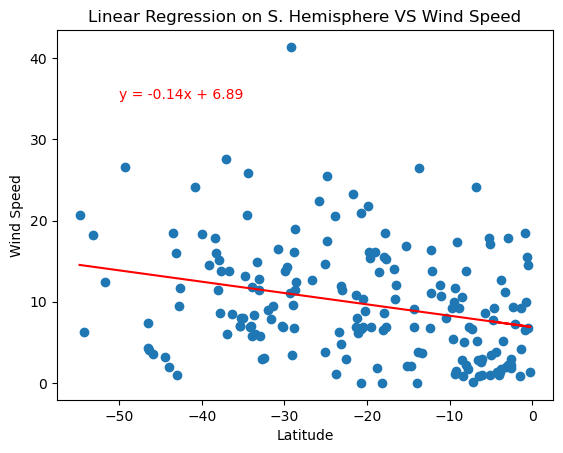

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#Run function for plot.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on S. Hemisphere VS Wind Speed',
                       'Wind Speed',(-50,35))

**Discussion about the linear relationship:** In the northern hemisphere it seems to be relatively consistent throught all latitudes. In the Southern hemisphere there is a slight relationship that the closer to the equator the wind speeds are closer to and are equal to or less than 10.